In [5]:
# Chapter 6 Generalizing to higher dimensions

from abc import ABCMeta, abstractmethod
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self, other):
        pass
    
    def __add__(self, other):
            return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)

class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    
    def scale(self, scalar ):
        return Vec2(scalar * self.x, scalar * self.y)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    

    
# Doing vector add with vec2 looks like this 

v = Vec2(3,4)
w = v.add(Vec2(-2,6))
print(w.x, Vec2(3,4) == Vec2(3,4), 3.0 * Vec2(1,0) + 4.0 * Vec2(0,1))

1 True Vec2(3.0,4.0)


In [6]:
# Building a vector base class:

from abc import ABCMeta, abstractmethod

In [7]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self, scalar):
        pass
    @abstractmethod
    def add(self, other):
        pass
    
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)
    def subtract(self, other):
        return self.add(-1 * other)
    def __sub__(self, other):
        return self.subtract(other)
    
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [8]:
   
print(Vec2(1,3) - Vec2(5,1))


Vec2(-4,2)


In [9]:
# Unit testing vector spaces classes(much needed)

s =-3
u,v = Vec2(42,-10), Vec2(1.5, 8)

s * (u + v) == s * v + s * u



True

In [10]:
from random import uniform

def random_scalar():
    return uniform(-10,10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

a = random_scalar()

u, v = random_vec2(), random_vec2()

In [11]:
from math import isclose

def approx_equal_vec2(v,w):
    return isclose(v.x, w.x) and isclose(v.y, w.y)

for _ in range(0,100):
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a *(u+v), a * v + a * u)

In [12]:
def testVec(eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    
    


In [13]:

for i in range(0,100):
    a, b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    testVec(approx_equal_vec2, a,b,u,v,w)

In [14]:
# Exploring different vector spaces
# Enumerating all coordinate vector spaces
class Vec1(Vector):
    def __init__(self,x):
        self.x = x
    def add(self,other):
        return Vec1(self.x + other.x)
    def scale(self,scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self,other):
        return self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)
    
    
    
class Vec0(Vector):
    def __init__(self):
        pass
    def add(self,other):
        return Vec0()
    def scale(self,scalar):
        return Vec0()
    @classmethod
    def zero(cls):
        return Vec0()
    def __eq__(self,other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return "Vec0()"

In [15]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime,
                 model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
        

In [16]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018, 11,30,12)
    def __init__(
        self, model_year, mileage, price, posted_datetime,
        model="(virtual)", source = "(virtual)",
        location="(virtual)", description="(virtual)"):
        
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
        
    def add(self, other):
        def add_dates(d1, d2):
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        
        return CarForSale(
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
            
    def scale(self, scalar):
        def scale_date(d):
            age = CarForSale.retrieved_date -  d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)
                            

In [17]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s,input_format).replace(year=2018)
    
    return dt
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2],  car[5],  car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [18]:
(cars[0] + cars[1]).__dict__

{'model_year': 4012,
 'mileage': 306000.0,
 'price': 6100.0,
 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [19]:
average_prius = sum(cars, CarForSale.zero()) * (1.0/len(cars))

average_prius.__dict__

{'model_year': 2012.5365853658536,
 'mileage': 87731.63414634147,
 'price': 12574.731707317074,
 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [29]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)
# Treating functions as vectors
def f(x):
    return 0.5 * x + 3

In [30]:
def g(x):
    return sin(x)


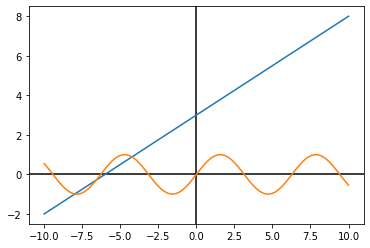

In [33]:

plot([f,g], -10,10)


In [34]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

In [46]:
class Matrix5_by_3(Vector):
    rows = 5
    columns = 3
    def __init__(self, matrix):
        self.matrix = matrix
        
    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a, b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))
    
    def scale(self, scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
        
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple(tuple(0 for j in range(0, cls.columns))
                                  for i in range(0, cls.rows)
        ))

In [47]:
# A class representing an image as a vector

In [50]:
from PIL import Image


class ImageVector(Vector):
    size = (300,300)
    def __init__(self, input):
        try:
            img = Image.open(input).resize(ImageVector.size)
            self.pixels = img.getdata()
        except:
            self.pixels = input
    
    def image(self):
        img = Image.new('RGB', ImageVector.size)
        img.putdata([(int(r), int(g),  int(b)) for (r,g,b) in self.pixels])
        return img
    
    def add(self, img2):
        return ImageVector([(r1+r2,g1+g2,b1+b2) for ((r1,g1,b1),(r2,g2,b2))
                            in zip(self.pixels, img2.pixels)])
    
    def scale(self,scalar):
        return ImageVector([(scalar*r, scalar*g, scalar*b)
                            for (r,g,b) in self.pixels])
        
    @classmethod
    def zero(cls):
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0, total_pixels)])
    
    def _repr_png_(self): #8
        return self.image()._repr_png_()

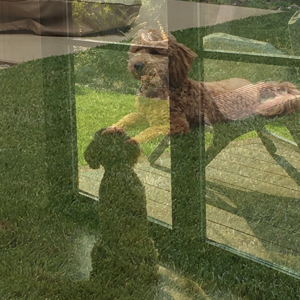

In [51]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [54]:
white = ImageVector([(225,225,225) for _ in range(0,300*300)])

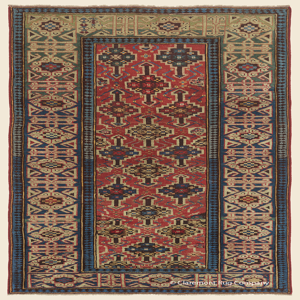

In [55]:
ImageVector("Kuba_R.jpg")

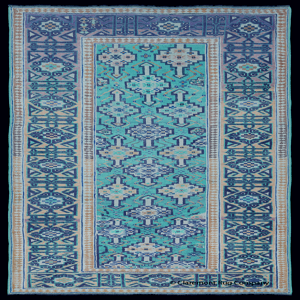

In [57]:
white - ImageVector("Kuba_R.jpg")

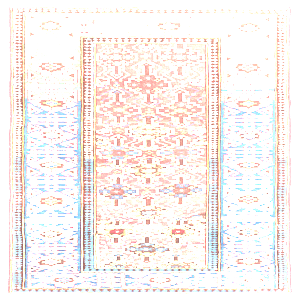

In [66]:
4 * ImageVector("Kuba_R.jpg")

In [ ]:
# Finding subspaces of the vector space of functions

# Implementing LinearFunctions inheriting from Vector.

# Instead of holding a function as its underlying data, it can hold two numbers for the coefficients a & b

# We can add these functions by adding coefficients and scale func by multiplying both coefficients by scalar.


In [68]:
class LinearFunction(Vector):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def add(self, v):
        return LinearFunction(self.a + v.a , self.b + v.b)
    def scale(self,scalar):
        return LinearFunction(scalar * self.a,scalar, self.b)
    def __call__(self,x):
        return self.a * x + self.b
    @classmethod
    def zero(cls):
        return LinearFunction(0,0,0)
    

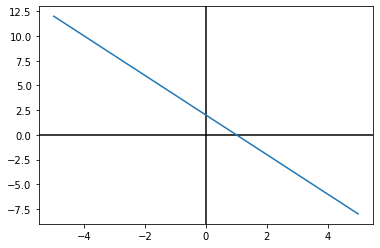

In [69]:
plot([LinearFunction(-2,2)], -5, 5)


In [75]:
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30 #<1>
square_width = 10

def ij(n):
    return (n // image_size[0], n % image_size[1])

def to_lowres_grayscale(img): #<2>

    matrix = [
        [0 for i in range(0,square_count)]
        for j in range(0,square_count)
    ]
    for (n,p) in enumerate(img.pixels):
        i,j = ij(n)
        weight = 1.0 / (2 * square_width * square_width)
        matrix[i // square_width][ j // square_width] += (sum(p) * weight)
    return matrix

def from_lowres_grayscale(matrix): #<3>
    def lowres(pixels, ij):
        i,j = ij
        return pixels[i // square_width][ j // square_width]
    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x,x,x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
    return make_highres(matrix)

In [76]:
v = ImageVector("Kuba_R.jpg")

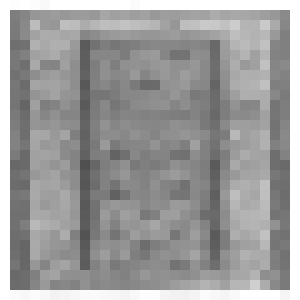

In [77]:
# a 30x30 list of numbers
lowres = to_lowres_grayscale(v)
from_lowres_grayscale(lowres)

In [ ]:
# Below classes were taken for souce cope to achive

In [78]:
class QuadraticFunction(Vector):
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    def add(self,v):
        return QuadraticFunction(self.a + v.a, self.b + v.b, self.c + v.c)
    def scale(self,scalar):
        return QuadraticFunction(scalar * self.a, scalar * self.b, scalar * self.c)
    def __call__(self,x):
        return self.a * x * x + self.b * x + self.c
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

In [ ]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)